# <font color="#F2600C"> CNN for German Traffic Sign Recognition

## <font color="#F2600C">Overview

In this project, we implement a Convolutional Neural Network (CNN) for image classification to detect and classify German traffic signs. The dataset consists of images categorized into 43 distinct classes. The goal of this project is to classify images of traffic signs into one of these categories accurately.

### <font color="#F2600C">Traffic Sign Categories

The traffic signs included in the dataset are as follows:

- Speed Limit 20  
- Speed Limit 30  
- Speed Limit 50  
- Speed Limit 60  
- Speed Limit 70  
- Speed Limit 80  
- End of a Speed Limit 80  
- Speed Limit 100  
- Speed Limit 120  
- No overtaking by trucks  
- Priority Road  
- Give way  
- Stop  
- All vehicles prohibited in both directions  
- No trucks  
- Other Hazards  
- Curve to left  
- Curve to right  
- Double curve, first to the left  
- Uneven Road  
- Slippery Road  
- Road Narrows Near Side  
- Roadworks  
- Traffic lights  
- No pedestrians  
- Children  
- Cycle Route  
- Be careful in winter  
- Wild animals  
- No parking  
- Turn right ahead  
- Turn left ahead  
- Ahead Only  
- Proceed straight or turn right  
- Proceed straight or turn left  
- Pass onto right  
- Pass onto left  
- Roundabout
- Crossroads
- No overtaking  
- End of Truck Overtaking Prohibition  

## <font color="#F2600C"> Requirements

In [101]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import math
from tensorflow.keras.models import load_model

## <font color="#F2600C"> Import Data

In [102]:
image_path="/kaggle/input/gtsrb-german-traffic-sign/Train/"
os.listdir(image_path)

['7',
 '17',
 '19',
 '22',
 '2',
 '35',
 '23',
 '10',
 '5',
 '36',
 '20',
 '27',
 '41',
 '39',
 '32',
 '25',
 '42',
 '8',
 '38',
 '12',
 '0',
 '31',
 '34',
 '18',
 '28',
 '16',
 '13',
 '26',
 '15',
 '3',
 '1',
 '30',
 '14',
 '4',
 '9',
 '21',
 '40',
 '6',
 '11',
 '37',
 '33',
 '29',
 '24']

In [103]:
labels=['7',
 '17',
 '19',
 '22',
 '2',
 '35',
 '23',
 '10',
 '5',
 '36',
 '20',
 '27',
 '41',
 '39',
 '32',
 '25',
 '42',
 '8',
 '38',
 '12',
 '0',
 '31',
 '34',
 '18',
 '28',
 '16',
 '13',
 '26',
 '15',
 '3',
 '1',
 '30',
 '14',
 '4',
 '9',
 '21',
 '40',
 '6',
 '11',
 '37',
 '33',
 '29',
 '24']

In [104]:
img_list=[]
label_list=[]
for label in labels:
    for img in os.listdir(image_path+label):
        img_list.append(image_path+label+"/"+img)
        label_list.append(label)

## <font color="#F2600C"> EDA (Exploratory Data Analysis)

In [105]:
df=pd.DataFrame({"img":img_list,"label":label_list})
df.sample(10)

,img,label
7346,/kaggle/input/gtsrb-german-traffic-sign/Train/...,10
8716,/kaggle/input/gtsrb-german-traffic-sign/Train/...,10
11130,/kaggle/input/gtsrb-german-traffic-sign/Train/...,36
6339,/kaggle/input/gtsrb-german-traffic-sign/Train/...,35
24865,/kaggle/input/gtsrb-german-traffic-sign/Train/...,13
34523,/kaggle/input/gtsrb-german-traffic-sign/Train/...,9
5423,/kaggle/input/gtsrb-german-traffic-sign/Train/...,35
18106,/kaggle/input/gtsrb-german-traffic-sign/Train/...,12
7085,/kaggle/input/gtsrb-german-traffic-sign/Train/...,23
23116,/kaggle/input/gtsrb-german-traffic-sign/Train/...,28


In [106]:
df.shape

(39209, 2)

In [107]:
df["label"]=df["label"].astype(int)

In [108]:
label_name={7:"Speed Limit 100",
 17:"No Entry",
 19:"Curve to left",
 22:"Uneven Road",
 2:"Speed Limit 50",
 35:"Ahead Only",
 23:"Slippery Road",
 10:"No overtaking by trucks",
 5:"Speed Limit 80",
 36:"Proceed straight or turn right",
 20:"Curve to right",
 27:"No pedestrians",
 41:"No overtaking",
 39:"Pass onto left",
 32:"No parking",
 25:"Roadworks",
 42:"End of Truck Overtaking Prohibition",
 8:"Speed Limit 120" ,
 38:"Pass onto right",
 12:"Priority Road",
 0:"Speed Limit 20",
 31:"Wild animals",
 34:"Turn left ahead",
 18:"Other Hazards",
 28:"Children",
 16:"No trucks",
 13:"Give way",
 26:"Traffic lights",
 15:"All vehicles prohibited in both directions",
 3:"Speed Limit 60",
 1:"Speed Limit 30",
 30:"Be careful in winter",
 14:"Stop",
 4:"Speed Limit 70",
 9:"Speed Limit 100",
 21:"Double curve, first to the left",
 40:"Roundabout",
 6: "End of a Speed Limit 80",
 37:"Proceed straight or turn left",
 33:"Turn right ahead",
 29:"Cycle Route",
 24:"Road Narrows Near Side",
11:"Crossroads"}

df["actual_label"]=df["label"].map(label_name)

In [109]:
df.sample(5)

,img,label,actual_label
29917,/kaggle/input/gtsrb-german-traffic-sign/Train/...,1,Speed Limit 30
28094,/kaggle/input/gtsrb-german-traffic-sign/Train/...,3,Speed Limit 60
28012,/kaggle/input/gtsrb-german-traffic-sign/Train/...,3,Speed Limit 60
23560,/kaggle/input/gtsrb-german-traffic-sign/Train/...,16,No trucks
12152,/kaggle/input/gtsrb-german-traffic-sign/Train/...,41,No overtaking


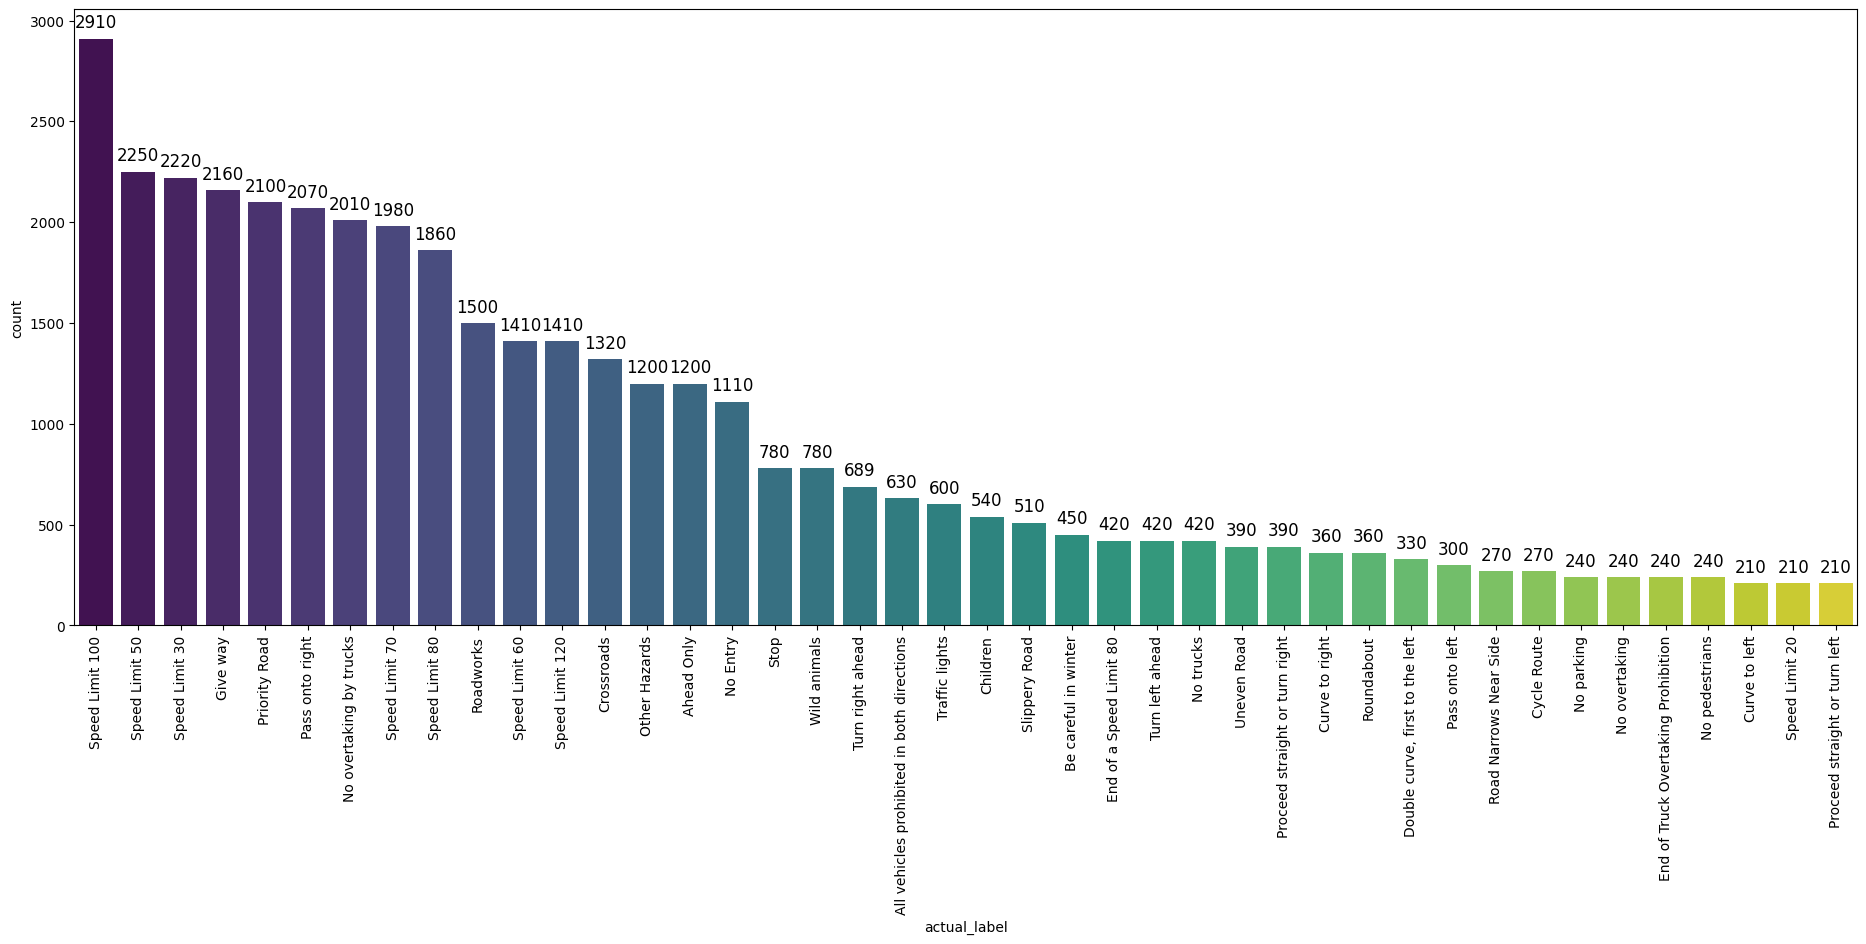

In [110]:
plt.figure(figsize=(23,8))
ax=sns.countplot(x=df["actual_label"],palette="viridis",order=df['actual_label'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5)
plt.xticks(rotation=90);

## <font color="#F2600C"> Preprocess Image

In [111]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 #normalization
    x.append(img)
x=np.array(x)

In [112]:
y=df[["label"]]

In [113]:
x.shape,y.shape

((39209, 32, 32, 3), (39209, 1))

### <font color="#F2600C"> Image Augmentation

In [114]:
from imblearn.over_sampling import SMOTE
x_flat = x.reshape(x.shape[0], -1)  
y_flat = y['label'].values 
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_flat, y_flat)
x_resampled_images = x_resampled.reshape(-1, 32, 32, 3)

In [115]:
x_resampled_images.shape,y_resampled.shape

((96750, 32, 32, 3), (96750,))

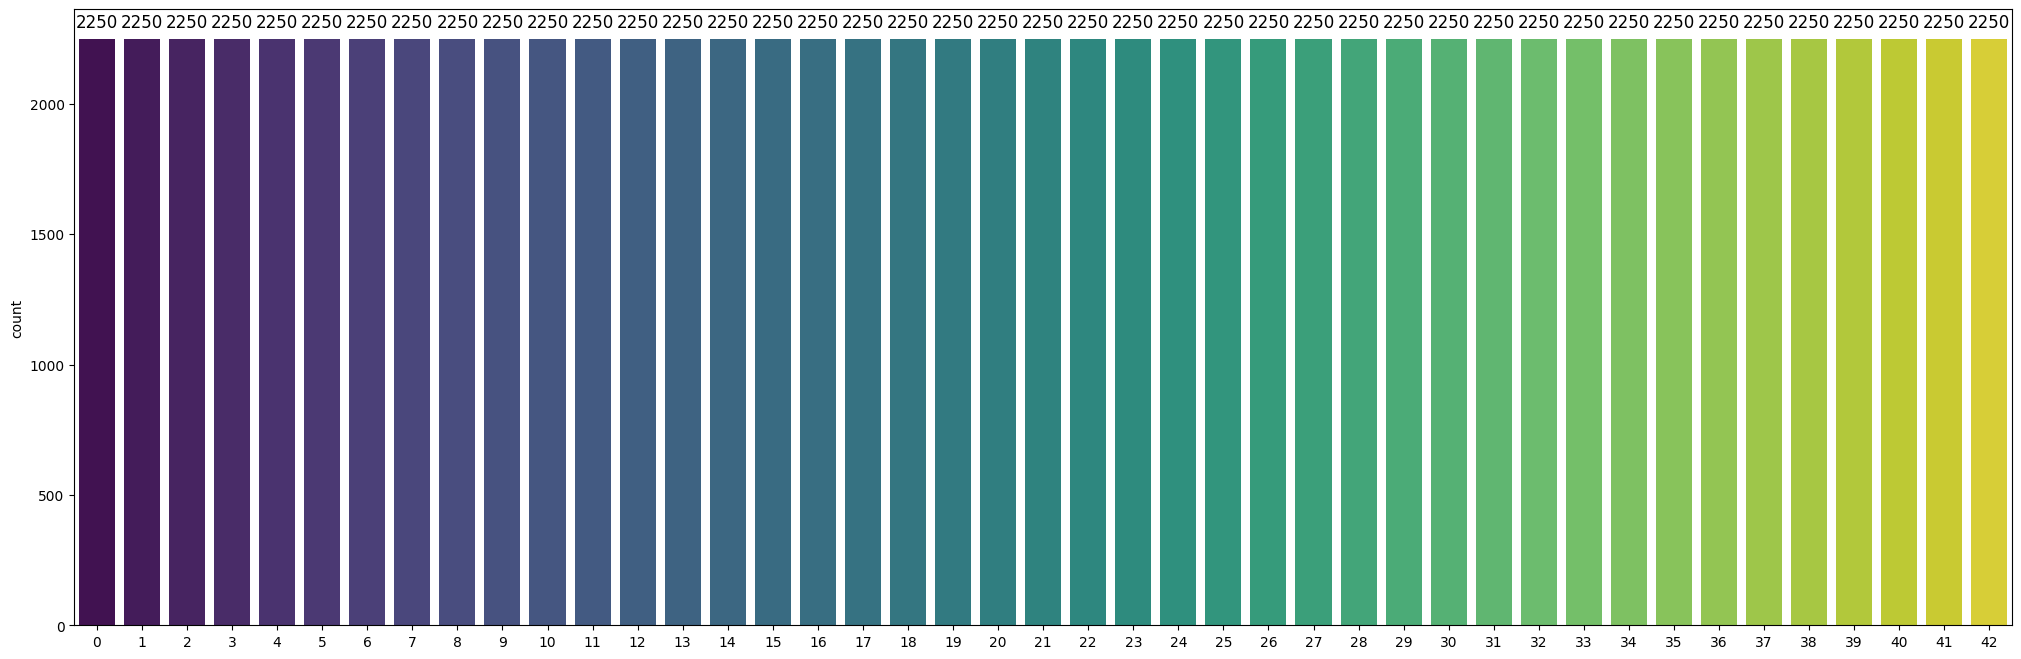

In [116]:
plt.figure(figsize=(25,8))
y_resampled_series = pd.Series(y_resampled)
ax=sns.countplot(x=y_resampled_series,palette="viridis")
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5);

## <font color="#F2600C"> Modelling

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled_images,y_resampled,test_size=.2,random_state=42)

In [118]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [119]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=36,verbose=1)

Epoch 1/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.2601 - loss: 2.5579 - val_accuracy: 0.8942 - val_loss: 0.2640
Epoch 2/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8738 - loss: 0.3897 - val_accuracy: 0.9690 - val_loss: 0.0865
Epoch 3/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9540 - loss: 0.1842 - val_accuracy: 0.9920 - val_loss: 0.0299
Epoch 4/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9700 - loss: 0.1323 - val_accuracy: 0.9925 - val_loss: 0.0290
Epoch 5/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9793 - loss: 0.0935 - val_accuracy: 0.9711 - val_loss: 0.1413
Epoch 6/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9759 - loss: 0.1035 - val_accuracy: 0.9895 - val_loss: 0.0433
Epoch 7/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9817 - loss: 0.0977 - val_accuracy: 0.9918 - val_loss: 0.0376
Epoch 8/50
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9856 -

In [138]:
#model.save("cnn_model.h5")

## <font color="#F2600C"> Modelling Overview

In [120]:
history.history['accuracy'][-1]

0.9929327964782715

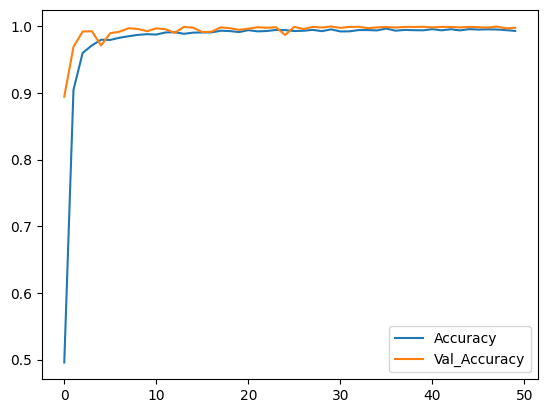

In [121]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

## <font color="#F2600C"> Testing the Model

In [122]:
df_test=pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
df_test=df_test[["ClassId","Path"]]
df_test.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


In [123]:
df_test['ClassId_name_actual']=df_test['ClassId'].map(label_name)
df_test.sample(5)

,ClassId,Path,ClassId_name_actual
7861,5,Test/07861.png,Speed Limit 80
3679,17,Test/03679.png,No Entry
2887,4,Test/02887.png,Speed Limit 70
5680,10,Test/05680.png,No overtaking by trucks
9553,27,Test/09553.png,No pedestrians


In [124]:
test_dir="/kaggle/input/gtsrb-german-traffic-sign/"
df_test["Path"]=test_dir+df_test["Path"]

In [125]:
df_test.sample(5)

,ClassId,Path,ClassId_name_actual
3930,8,/kaggle/input/gtsrb-german-traffic-sign/Test/0...,Speed Limit 120
10421,38,/kaggle/input/gtsrb-german-traffic-sign/Test/1...,Pass onto right
4079,18,/kaggle/input/gtsrb-german-traffic-sign/Test/0...,Other Hazards
3978,31,/kaggle/input/gtsrb-german-traffic-sign/Test/0...,Wild animals
308,7,/kaggle/input/gtsrb-german-traffic-sign/Test/0...,Speed Limit 100


In [126]:
x_test=[]
for img in df_test['Path']:
    img=cv2.imread(img)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(32,32))
    img=img/255.0 #normalization
    x_test.append(img)
x_test=np.array(x_test)

In [127]:
x_test = x_test.reshape((-1, 32, 32, 3))

In [128]:
y_test=df_test[["ClassId"]]

In [132]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [133]:
accuracy_score(predictions,y_test)

0.9583531274742676

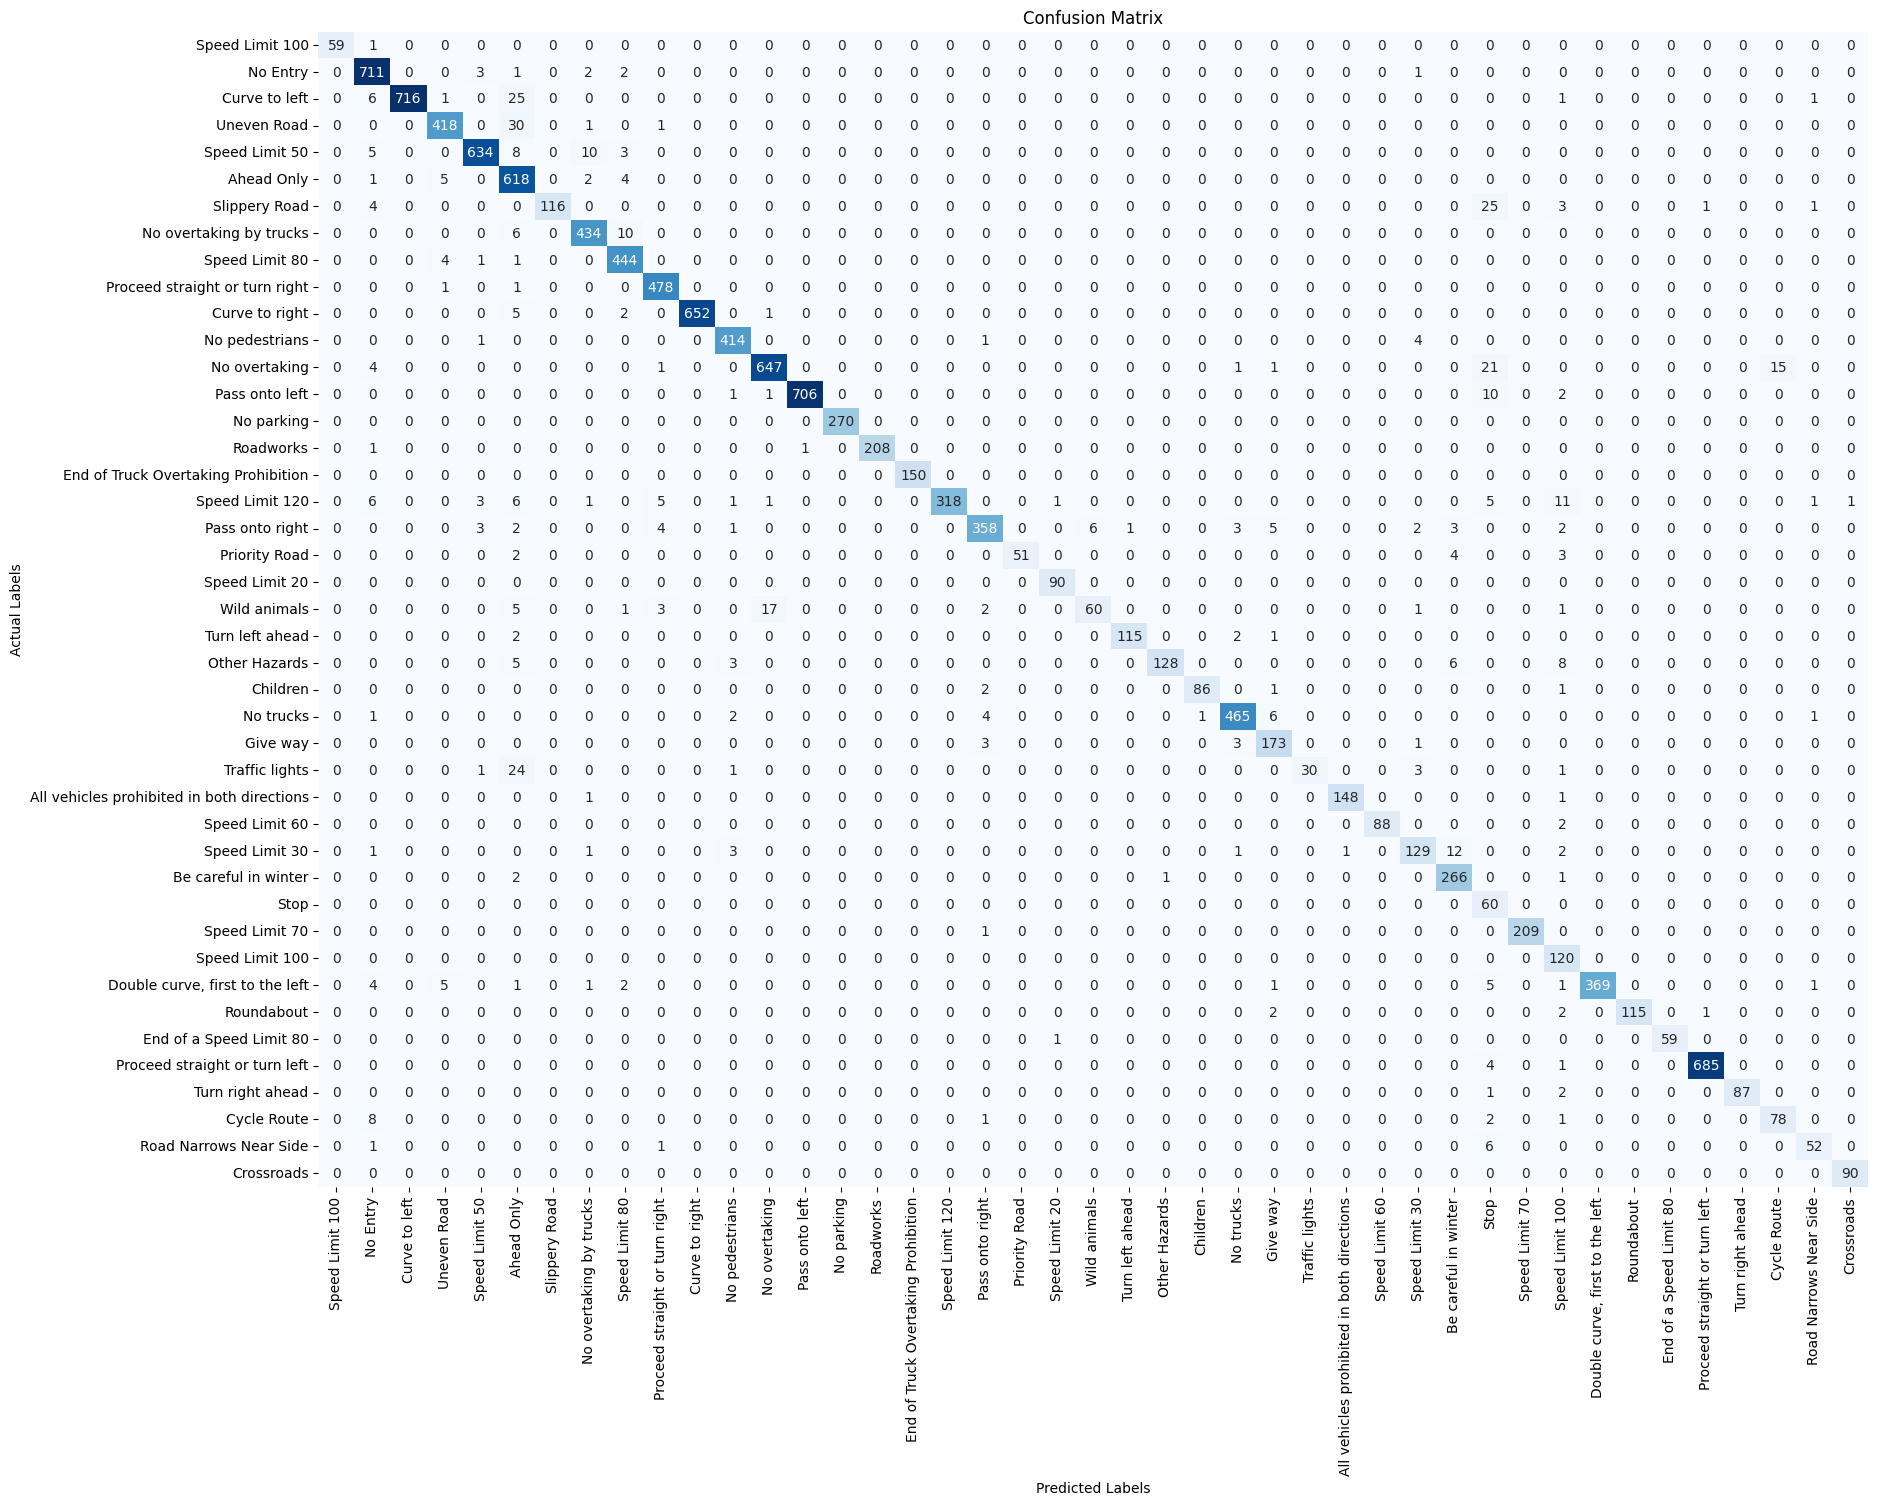

In [134]:
cm = confusion_matrix(y_test, predictions)  

plt.figure(figsize=(20, 15))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=label_name.values(),
    yticklabels=label_name.values(),
    cbar=False
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix');

## <font color="#F2600C">Results

The model achieved an overall accuracy of **95.84%** on the test dataset. This high accuracy indicates that the Convolutional Neural Network (CNN) effectively learned to classify images of german traffic signs into their respective categories.